<a href="https://colab.research.google.com/github/Shivachikkonda02/-Bank-Marketing-Analysis-and-Classification-ML-Project/blob/main/ARIMA_And_Seasonal_ARIMA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/perrin-freres-monthly-champagne-.csv")
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [4]:
df.columns=['Month','Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.dropna(inplace=True)

In [6]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [8]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


In [10]:
df.set_index('Month',inplace=True)

In [11]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [12]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<Axes: xlabel='Month'>

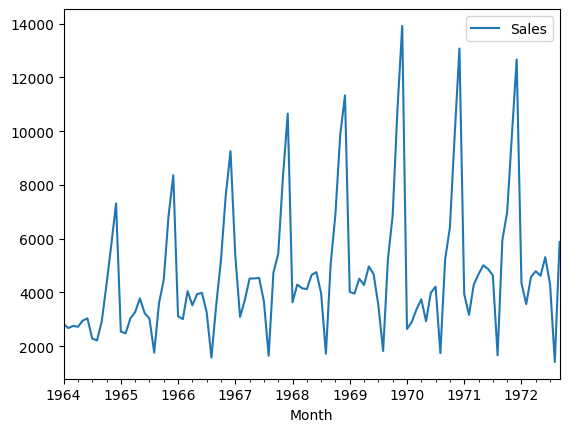

In [13]:
df.plot()

In [14]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [15]:
def adf_test(series):
  result=adfuller(series)

  print("ADF Statistics:",result[0])
  print("p-value:",result[1])

In [16]:
adf_test(df['Sales'])

ADF Statistics: -1.8335930563276215
p-value: 0.36391577166024586


In [18]:
##Differencing

df['Sales first difference']=df['Sales'].diff(1)

In [19]:
df.head()

,Sales,Sales first difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [20]:

df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [23]:
df['seasonal first difference']=df['Sales'].diff(12)

In [24]:
df.head()

,Sales,Sales first difference,seasonal first difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [25]:
df.head(15)

,Sales,Sales first difference,seasonal first difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [28]:
adf_test(df['seasonal first difference'].dropna())

ADF Statistics: -7.626619157213166
p-value: 2.0605796968136632e-11


<Axes: xlabel='Month'>

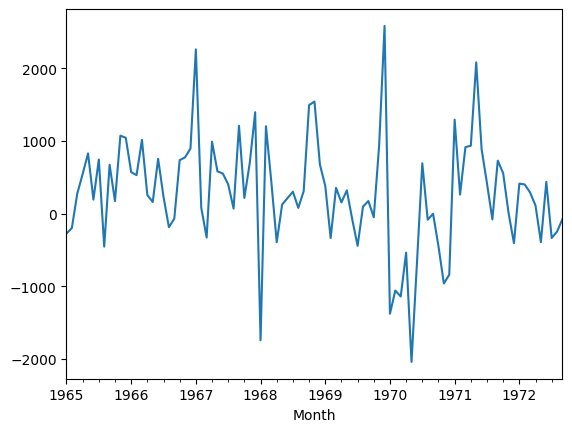

In [39]:
df['seasonal first difference'].dropna().plot()

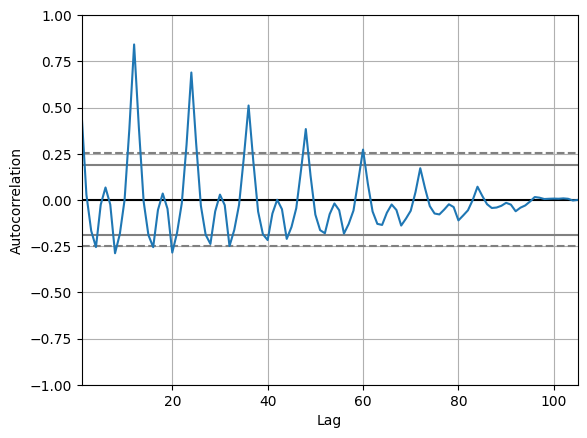

In [34]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

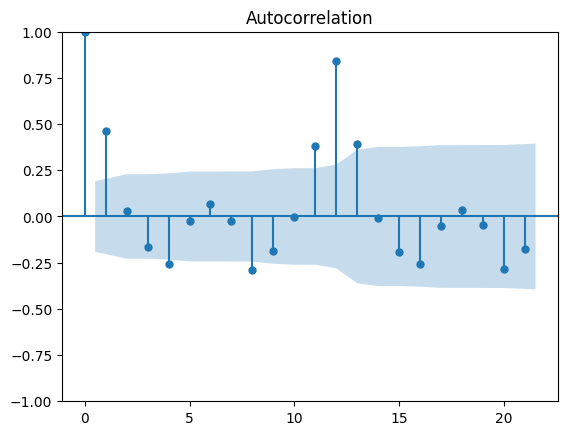

In [31]:
acf=plot_acf(df['Sales'])

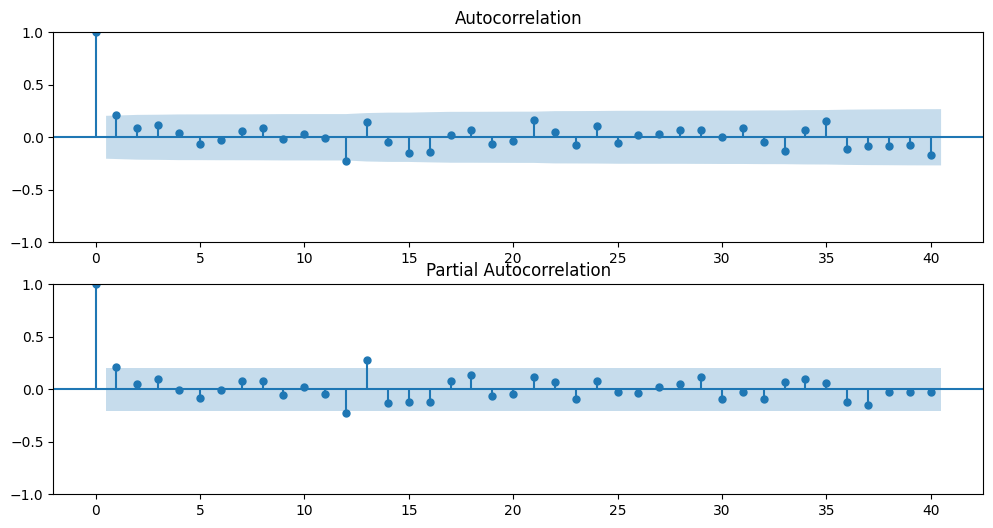

In [38]:
fig=plt.figure(figsize=(12,6))

ax1=fig.add_subplot(211)
fig=plot_acf(df['seasonal first difference'].iloc[13:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(df['seasonal first difference'].iloc[13:],lags=40,ax=ax2)

In [40]:
# For non-seasonal data
# p=1, d=1, q=0 or 1

from statsmodels.tsa.arima.model import ARIMA

In [42]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [43]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Sat, 08 Jun 2024   AIC                           1911.627
Time:                        09:37:48   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.001      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.329      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.000    4.02e+06    6.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

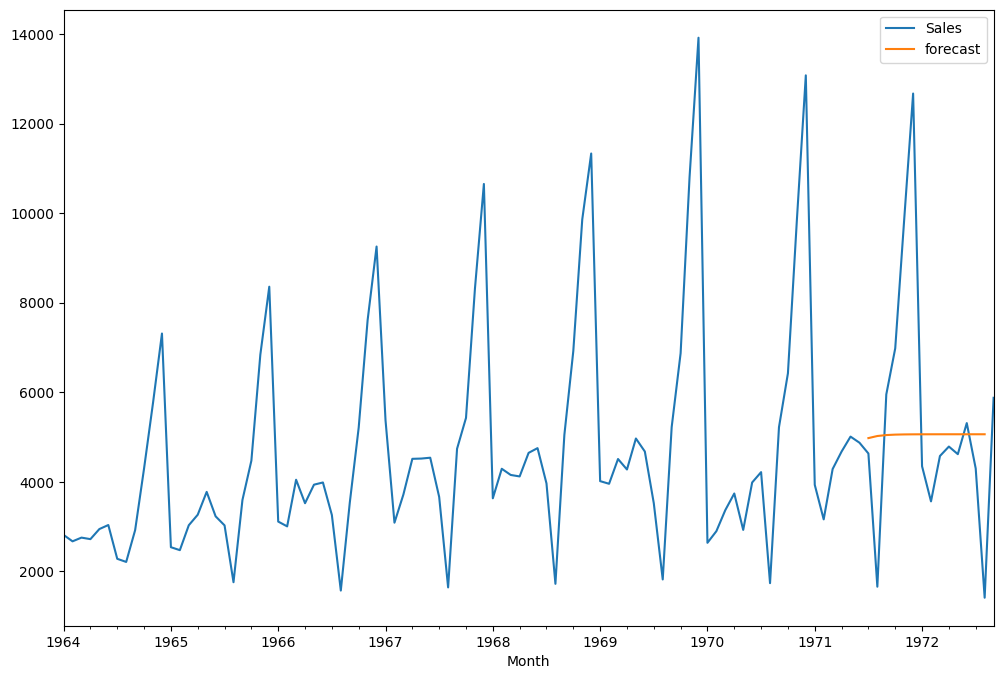

In [44]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [49]:
!pip install statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX # import SARIMAX from the correct module

In [53]:
model=SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

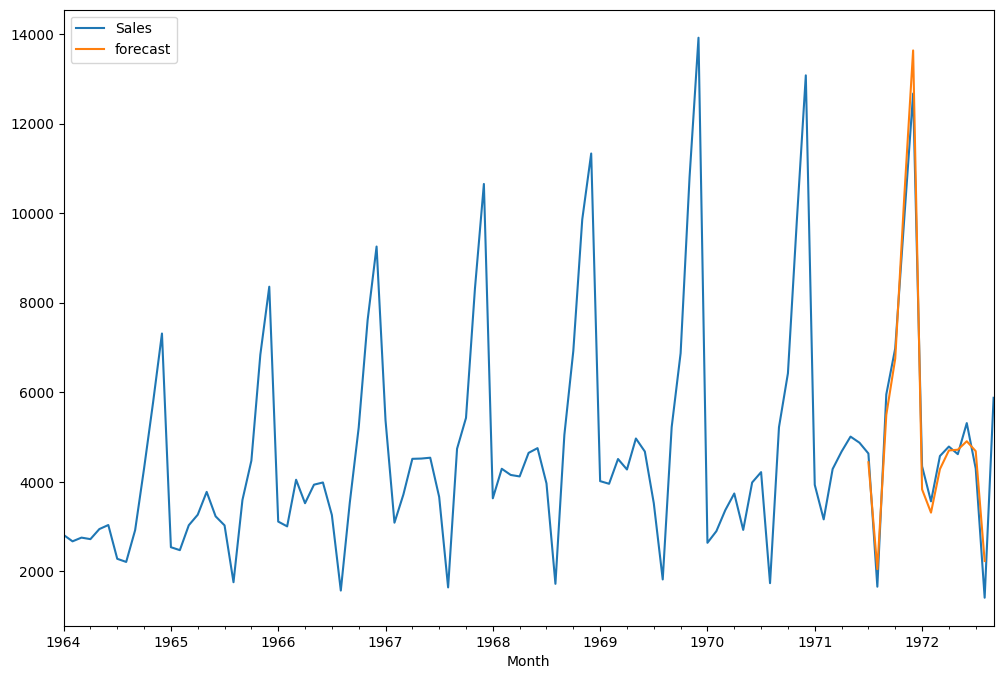

In [54]:
df['forecast'] = results.predict(start=90, end=103, dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [55]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+DateOffset(months=x)for x in range (0,24)]

In [56]:
future_dateset_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [57]:
future_dateset_df.tail()

,Sales,Sales first difference,seasonal first difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [58]:
future_df=pd.concat([df,future_dateset_df])

In [60]:
future_df.tail()

,Sales,Sales first difference,seasonal first difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['dynaic']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

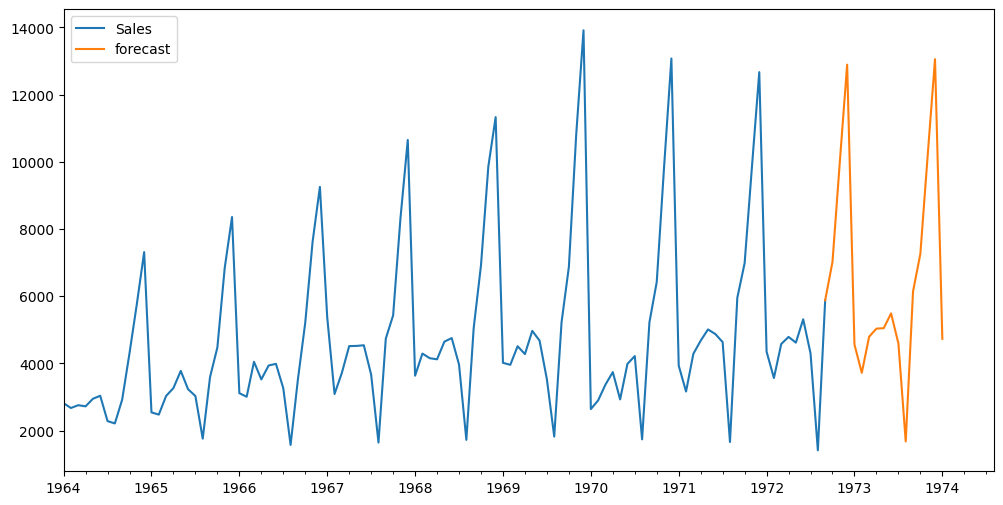

In [59]:
future_df['forecast']=results.predict(start=104,end=120,dynaic=True)
future_df[['Sales','forecast']].plot(figsize=(12,6))